In [24]:
import os
import psycopg2
import paho.mqtt.client as mqtt
import time
import json
from dotenv import load_dotenv

load_dotenv()

# read variables from env
db_host = os.environ.get("PG_HOST")
db_port = os.environ.get("PG_PORT")

db_name = os.environ.get("PG_DATABASE")

db_user = os.environ.get("PG_USER")
db_password = os.environ.get("PG_PASSWORD")

# connect to database
try:
    conn = psycopg2.connect(
        dbname=db_name, user=db_user, password=db_password, host=db_host, port=db_port
    )
    print("Verbindung zur Datenbank hergestellt!")
except psycopg2.OperationalError as e:
    print(f"Fehler beim Verbinden mit der Datenbank: {e}")

Verbindung zur Datenbank hergestellt!


In [25]:
cur = conn.cursor()

cur.execute(
    """SELECT
  HERSTELLER_NAME AS HERSTELLER,
  EXTRACT(
    MONTH
    FROM
      KAUF_KALENDER_DATUM
  ) AS MONAT,
  EXTRACT(
    YEAR
    FROM
      KAUF_KALENDER_DATUM
  ) AS JAHR
FROM
  MART.FACT_KAUF
  LEFT JOIN MART.DIM_FAHRZEUG ON FACT_KAUF.DIM_FAHRZEUG_ID = DIM_FAHRZEUG.DIM_FAHRZEUG_ID;"""
)

records = cur.fetchall()

In [26]:
import pandas as pd

df = pd.DataFrame(records, columns=[desc[0] for desc in cur.description])

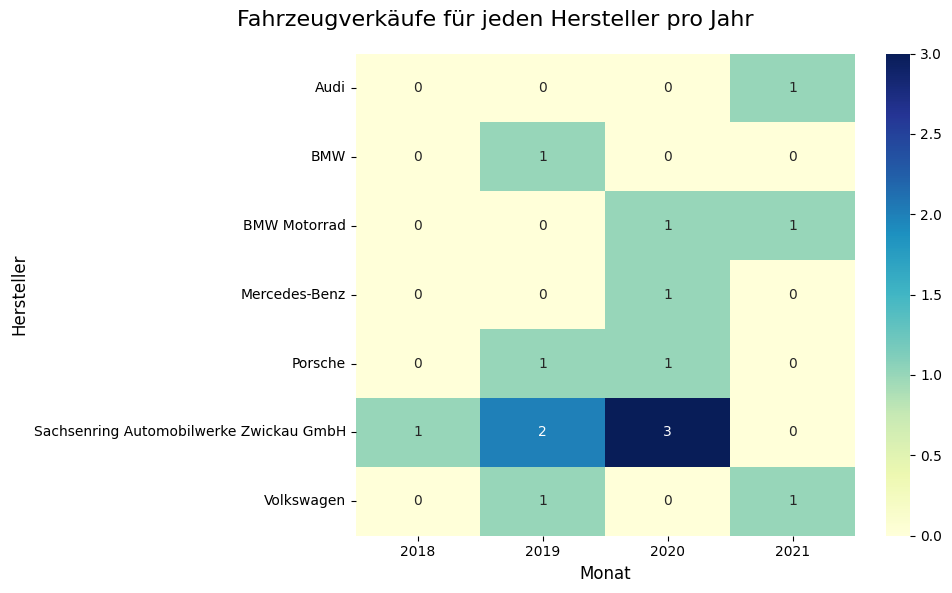

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = df.pivot_table(
    index="hersteller", columns="jahr", aggfunc="size", fill_value=0
)

# Heatmap erstellen mit seaborn

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d")
plt.suptitle("Fahrzeugverkäufe für jeden Hersteller pro Jahr", fontsize=16)
plt.xlabel("Monat", fontsize=12)
plt.ylabel("Hersteller", fontsize=12)
plt.tight_layout()
plt.show()